# German Credit Risk || Data Exploring & EDA Analysis
## Overview
   The dataset demonstates the information of each individuals who takes a credit by a German bank. In this project, I will explore the behavior of German borrowers. The questions are:
- What purpose do German borrowers apply for credit loans?
- How many jobs do each borrower have?
- How long are the durations for credit loans?
- ...
- Visualizations for:
   + Credit Amount Distribution
   + Credit Amount Distribution by Gender
   + Credit Amount Distribution by Purpose
   + Credit Amount Distribution by Saving account
## Key points
   - The **Average Borrowers** are **Young Adulds** (35.546)
   - The **Average Credit amount** is **3271.258** Deutsch Mark
   - The **Average Duration** is **Short-term** (20.903 months)
   - The **Highest Distribution of Credit Amount** is **about 1250 Deutsch Mark** by slightly 160 individuals
   - **Most Credit Amount** is used for **Vacation/Others** purpose at **above 17500 Deutsch Mark**
   - **Most Credit Amount** is borrowed by people who have **Little amount of money in Saving account** at **58.8%**

### 1. Data Installing

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv('german_credit_data.csv')

### 2. EDA (Exploratory of Data Analysis)
#### 2.1. Data Preparation

In [186]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [187]:
df.shape

(1000, 10)

There are **183 null values** for **Saving accounts** and **394 null values** for **Checking account**. This indicates that those individuals **do not have Saving accounts and Checking account**, or they are **0**.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [189]:
df_filled = df.fillna('not exist', inplace=True)
df.rename(columns={'Unnamed: 0': 'Id', 'B': 'Y'}, inplace=True)
df.reset_index(drop=True, inplace=True)

In [190]:
df.head(5)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,not exist,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,not exist,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


#### 2.2. Numerical Variable Analysis

Descriptive Statistics show that:
   - The average **Borrowers** are **Young Adulds** (35.546)
   - The average **Credit amount** is **3271.258** Deutsch Mark
   - The average **Duration** is **Short-term** (20.903 months)

In [191]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


These are **values** and **value counts** for each column, including **Sex, Housing, Saving accounts, Checking accounts and Purpose**

In [192]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

Sex
male      690
female    310
Name: count, dtype: int64 


Housing
own     713
rent    179
free    108
Name: count, dtype: int64 


Saving accounts
little        603
not exist     183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64 


Checking account
not exist    394
little       274
moderate     269
rich          63
Name: count, dtype: int64 


Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 




### 3. Distribution Visualization

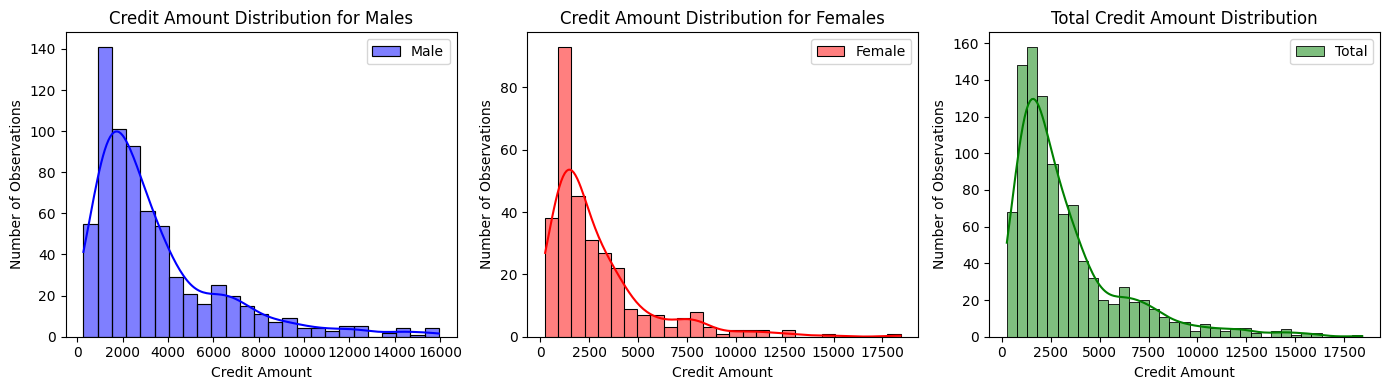

In [193]:
male_credit=df['Credit amount'].loc[df['Sex']=='male']
female_credit=df['Credit amount'].loc[df['Sex']=='female']
total_credit=df['Credit amount']

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1) 
sns.histplot(male_credit, kde=True, color='blue', label='Male', )
plt.xlabel('Credit Amount')
plt.ylabel('Number of Observations')
plt.title('Credit Amount Distribution for Males')
plt.legend() 

plt.subplot(1, 3, 2) 
sns.histplot(female_credit, kde=True, color='red', label='Female')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Observations')
plt.title('Credit Amount Distribution for Females')
plt.legend()  

plt.subplot(1, 3, 3) 
sns.histplot(total_credit, kde=True, color='green', label='Total')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Observations')
plt.title('Total Credit Amount Distribution')
plt.legend()  

plt.tight_layout() 
plt.show()

<BarContainer object of 1000 artists>

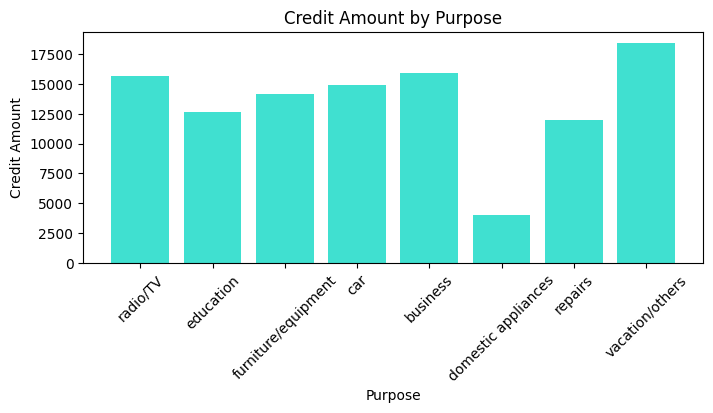

In [209]:
x=df['Purpose']
y=df['Credit amount']

plt.figure(figsize=(8, 3))

plt.xlabel('Purpose')
plt.ylabel('Credit Amount')
plt.title('Credit Amount by Purpose')
plt.xticks(rotation=45)
plt.bar(x,y, color='turquoise')

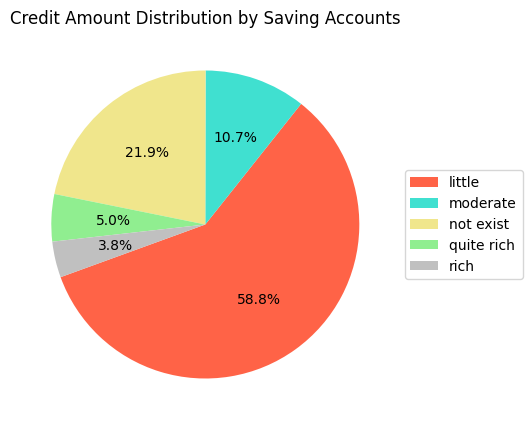

In [195]:
credit_by_saving = df.groupby('Saving accounts')['Credit amount'].sum()

plt.figure(figsize=(5, 5))
colors = ['tomato','turquoise','khaki','lightgreen','silver']
plt.pie(credit_by_saving, autopct='%1.1f%%', startangle=200, colors=colors)
plt.title('Credit Amount Distribution by Saving Accounts')
plt.legend(credit_by_saving.index, loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()